# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [30]:
boston = pd.read_csv('boston_data.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [31]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [32]:
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

### Next, we want to explore the data. Pick several variables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

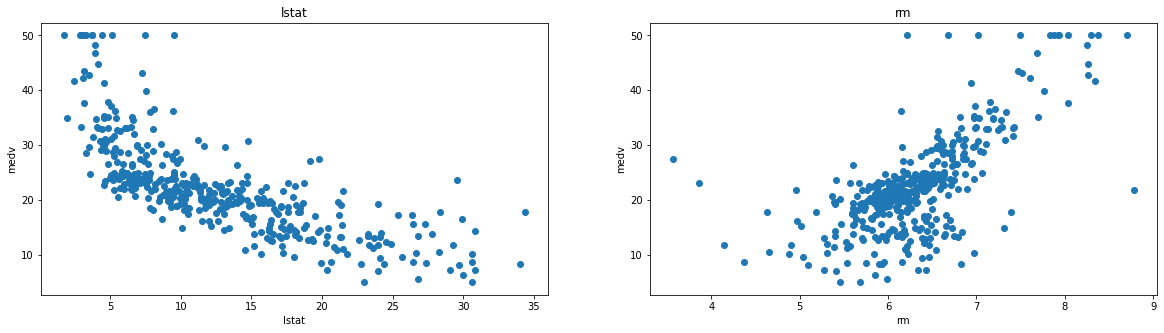

In [33]:
plt.figure(figsize=(20, 5))

features = ['lstat', 'rm']
target = boston['medv']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('medv')

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
#there seems to be a positive relation between rm or Average number of rooms per dwelling and price of homes. On the other hand, as the percentage of population with
#lower status increases, price decreases. It's not so unexpected.

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

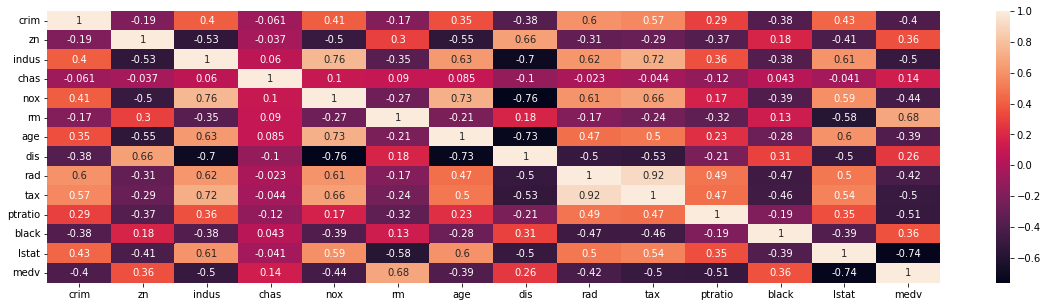

In [34]:
plt.figure(figsize=(20, 5))
correlation_matrix = boston.corr()
sns.heatmap(data=correlation_matrix, annot=True)

In [35]:
boston.drop(columns='rad',axis=1,inplace=True)

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [36]:
boston['medv'].describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [37]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    r2 = r2_score(y_true, y_predict)

    return r2

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [38]:
from sklearn.model_selection import train_test_split

X = boston.drop(['medv'],axis=1)
y = boston['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(303, 12)
(101, 12)
(303,)
(101,)


----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [39]:
# Five separate RFR here with the given max depths

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
# Grid Search goes through all combinations of hyperparameters
from sklearn.model_selection import GridSearchCV


# Number of trees in random forest
n_estimators = [10,100,500]

# Maximum number of levels in each tree
max_depth = [2,4,6,8,10]

In [42]:
# Create the  grid 

grid = {'n_estimators': n_estimators,
        'max_depth': max_depth}

In [43]:
# Instantiate the grid search model object

forest = RandomForestRegressor()

grid_search = GridSearchCV(estimator = forest, param_grid = grid, cv = 5)

In [44]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'n_estimators': [10, 100, 500]})

In [45]:
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [46]:
grid_search.best_score_

0.8319306549320583

In [47]:
grid_search.score(X_test, y_test)

0.7763425093188396

Now, plot the score for each tree on the training set and on the testing set.

In [48]:
# Produce a plot with the score for the testing and training for the different max depths

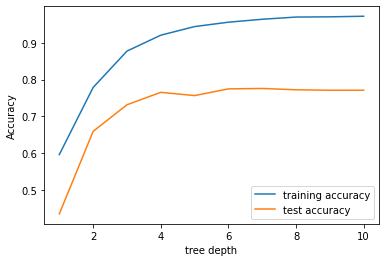

In [49]:
# hyperparameter tuning
training_accuracy = []
test_accuracy = []
# trying tree depth from 1 to 10 instead
tree_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for depth in tree_depth:
  # build the model
  model = RandomForestRegressor(max_depth=depth)
  #training the model
  model.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(model.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(model.score(X_test, y_test))

plt.plot(tree_depth, training_accuracy, label="training accuracy")
plt.plot(tree_depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("tree depth")
plt.legend()

plt.show() 

In [50]:
model.feature_importances_

array([0.05138246, 0.00108572, 0.01182105, 0.00215647, 0.02114298,
       0.47704895, 0.01817527, 0.03270989, 0.01784733, 0.02027492,
       0.0164845 , 0.32987046])

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [51]:
# The model improves slightly as the depth of the trees increases, but after 6 it plateaus and slightly decreases near the end

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [52]:
# Your response here: with a max depth of 1 it has high bias and low variance, it underfits. With a max depth of 10, it becomes more accurate. 

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [61]:
forest = RandomForestRegressor(max_depth = 8) # it's the most optimal one according to the plot above
                            
forest.fit(X_train, y_train)
forest.score(X_test,y_test)

0.7798044907376168

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [60]:
# I don't think the data is relevant at all now, considering it's been more than 40 years and housing prices have risen considerably since. Features aren't that descriptive either. In fact,
# the majority of the features aren't important. 
# The model is not robust enough, we would need to tweak some of the features to boost its performance, and more data would be required too
# No, data collected for an urban city would not be applicable for a rural city, I wouldn't even venture to say that a Boston housing dataset can be applicable for another city of similar
# size and population. More variables influence housing prices...